### Importation des bibliotheques

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score # va permettre de separer le jeu de donnees en jeu de test et d'entrainnement 
from sklearn.metrics import accuracy_score ,confusion_matrix,f1_score,recall_score,classification_report # va permettre d'afficher la performance de notre modele
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier


## Chargement du jeu de donnees avec la fonction read_excel de pandas

In [2]:
data=pd.read_excel("FILE.xlsx",names=["erythema",'scaling',"definite_borders","itching","koebner_phenomenon","polygonal_papules","follicular_papules","oral_mucosal_involvement","knee_and_elbow_involvement","scalp_involvement","family_history","melanin_incontinence","eosinophils_in_the_infiltrate","PNL_infiltrate","fibrosis_of_the_papillary_dermis","exocytosis","acanthosis","hyperkeratosis","parakeratosis","clubbing_of_the_rete_ridges","elongation_of_the_rete_ridges","thinning_of_the_suprapapillary_epidermis","spongiform_pustule","munro_microabcess",'focal_hypergranulosis',"disappearance_of_the_granular_layer","vacuolisation_and_damage_of_basal_layer","spongiosis","saw-tooth_appearance_of_retes","follicular_horn_plug","perifollicular_parakeratosis","inflammatory_monoluclear_inflitrate","band-like_infiltrate","Age","class"])
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [3]:
data=pd.DataFrame(data)
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,2,2,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,40,2
360,2,2,1,1,0,0,0,0,0,0,...,0,0,3,0,0,0,1,0,25,2
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4


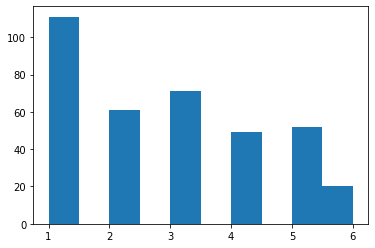

In [4]:
plt.hist(data["class"])
plt.show()

# Construction des donnees 

## Elle se fait en divisant le jeu de donnees en jeu de test et jeu d'entrainement,avec la fonction train_test_split de sklearn

In [5]:
# Splitting original dataset into training dataset and test dataset
print("Splitting data...")
features = data.iloc[:, 0:34]   # tableau contenant tous les emails
labels = data.iloc[:, -1]     # tableau contenant tous les etiquettes
print(labels)
training_data, test_data, training_labels, test_labels =\
train_test_split(features, labels, test_size = 0.30, random_state = 42) # separation des donnees
    
print("flag 3: splitted data")
print(training_data)
print(test_data) 

Splitting data...
0      2
1      1
2      3
3      1
4      3
      ..
359    2
360    2
361    4
362    4
363    3
Name: class, Length: 364, dtype: int64
flag 3: splitted data
     erythema  scaling  definite_borders  itching  koebner_phenomenon  \
268         2        2                 1        1                   0   
232         3        2                 0        2                   0   
157         3        3                 2        2                   0   
19          1        1                 0        3                   0   
147         1        1                 0        3                   0   
..        ...      ...               ...      ...                 ...   
71          2        1                 2        0                   0   
106         1        1                 0        1                   1   
270         2        2                 1        0                   1   
348         3        2                 2        0                   0   
102         3      

## Construction  et evaluation du modèle KNN

In [7]:
classifier=KNeighborsClassifier(n_neighbors=1)

classifier.fit(training_data,training_labels) # Entrainement du modele de knn



KNeighborsClassifier(n_neighbors=1)

In [8]:
predictio=classifier.predict(training_data) 
predictio

array([6, 2, 3, 5, 5, 5, 2, 3, 3, 2, 4, 4, 2, 3, 2, 1, 4, 6, 1, 1, 1, 2,
       3, 3, 5, 3, 1, 1, 4, 2, 2, 1, 1, 1, 5, 3, 3, 2, 5, 1, 1, 2, 3, 2,
       5, 2, 5, 3, 2, 3, 6, 4, 6, 2, 3, 4, 2, 2, 3, 1, 1, 2, 4, 1, 5, 2,
       4, 3, 4, 4, 3, 2, 1, 1, 5, 3, 1, 1, 3, 1, 1, 5, 1, 2, 4, 3, 5, 3,
       3, 5, 5, 1, 3, 2, 4, 1, 1, 3, 4, 1, 3, 2, 3, 1, 1, 5, 5, 6, 5, 5,
       5, 3, 4, 1, 2, 2, 2, 2, 2, 2, 3, 1, 6, 2, 5, 4, 1, 6, 4, 1, 4, 2,
       3, 5, 1, 4, 4, 1, 1, 4, 6, 1, 1, 1, 3, 3, 4, 4, 2, 5, 1, 3, 1, 1,
       3, 1, 6, 1, 6, 5, 1, 5, 2, 2, 4, 3, 1, 3, 5, 1, 5, 4, 2, 3, 2, 2,
       5, 5, 3, 4, 3, 1, 1, 3, 4, 3, 5, 4, 4, 5, 2, 2, 3, 3, 4, 1, 1, 1,
       3, 1, 1, 4, 5, 2, 1, 5, 1, 1, 3, 1, 1, 1, 1, 5, 4, 6, 1, 1, 5, 3,
       3, 1, 4, 2, 3, 4, 2, 1, 3, 2, 3, 4, 1, 3, 1, 6, 4, 4, 2, 1, 1, 6,
       3, 1, 3, 5, 3, 6, 2, 6, 4, 4, 6, 1], dtype=int64)

In [9]:
accuracy=accuracy_score(training_labels,predictio)
accuracy

1.0

In [10]:
prediction=classifier.predict(test_data) # PREDICTION AVEC KNN AU PREALABLE ENTRAINE
prediction

array([1, 1, 4, 4, 3, 1, 2, 1, 1, 6, 5, 1, 4, 1, 2, 2, 2, 4, 4, 5, 4, 1,
       3, 5, 1, 2, 4, 4, 4, 2, 1, 3, 6, 1, 3, 3, 1, 5, 5, 5, 3, 1, 1, 4,
       1, 1, 2, 4, 4, 3, 2, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 5, 5,
       5, 1, 5, 4, 3, 3, 1, 1, 3, 5, 2, 5, 1, 2, 1, 5, 3, 3, 4, 4, 1, 3,
       3, 1, 1, 6, 3, 1, 3, 5, 4, 1, 4, 5, 4, 3, 1, 1, 1, 2, 1, 2, 1, 1],
      dtype=int64)

In [11]:
accuracy=accuracy_score(test_labels,prediction)
accuracy

0.9090909090909091

In [12]:
f = f1_score(test_labels,prediction,average='macro') # PERFORMANCE DU MODELE KNN AVEC LA METRIC F_MESURE  DE SKLEARN 
f

0.8612343050362369

In [13]:
confusion_matrix=confusion_matrix(test_labels,prediction) # MATRICE DE CONFUSION DE KNN
confusion_matrix

array([[41,  0,  0,  0,  0,  1],
       [ 0, 11,  0,  6,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0],
       [ 0,  1,  0,  1, 15,  0],
       [ 0,  0,  0,  1,  0,  3]], dtype=int64)

In [15]:
arbre=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=7,min_samples_leaf=5)
arbre.fit(training_data,training_labels)

pred=arbre.predict(test_data)
pred



array([1, 1, 4, 6, 3, 1, 2, 1, 1, 6, 5, 1, 4, 1, 2, 2, 2, 5, 4, 5, 4, 1,
       3, 5, 1, 2, 4, 4, 4, 2, 1, 3, 1, 1, 3, 3, 1, 5, 5, 5, 3, 1, 1, 2,
       1, 1, 2, 2, 2, 3, 2, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 5, 5,
       5, 1, 5, 2, 3, 3, 1, 1, 3, 5, 2, 2, 1, 2, 1, 5, 3, 3, 2, 4, 1, 3,
       3, 1, 1, 2, 3, 1, 3, 5, 4, 1, 4, 5, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1],
      dtype=int64)

In [16]:
accura=accuracy_score(test_labels,pred)
accura



0.9545454545454546

In [17]:
f = f1_score(test_labels,pred,average='micro')
f

0.9545454545454546

In [18]:
from sklearn.metrics import accuracy_score ,confusion_matrix

confusion_matrix=confusion_matrix(test_labels,pred)
confusion_matrix

array([[42,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  1,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  1,  0, 10,  0,  0],
       [ 0,  2,  0,  0, 15,  0],
       [ 0,  1,  0,  0,  0,  3]], dtype=int64)

In [20]:
mode = RandomForestClassifier(n_estimators=15)
mode.fit(training_data,training_labels)

RandomForestClassifier(n_estimators=15)

In [21]:
pred1 = mode.predict(test_data)
pred1

array([1, 1, 4, 6, 3, 1, 2, 1, 1, 6, 5, 1, 4, 1, 2, 5, 2, 5, 4, 5, 4, 1,
       3, 5, 1, 2, 4, 4, 4, 2, 1, 3, 1, 1, 3, 3, 1, 5, 5, 5, 3, 1, 1, 2,
       1, 1, 2, 2, 2, 3, 2, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 5, 5,
       5, 1, 5, 2, 3, 3, 1, 1, 3, 5, 2, 5, 1, 2, 1, 5, 3, 3, 2, 4, 1, 3,
       3, 1, 1, 6, 3, 1, 3, 5, 4, 1, 4, 5, 2, 3, 1, 1, 1, 2, 1, 2, 1, 1],
      dtype=int64)

In [22]:
accur=accuracy_score(test_labels,pred1)
accur


0.9818181818181818

In [23]:
f = f1_score(test_labels,pred1,average='micro')
f

0.9818181818181818

In [24]:
confusion_matrix=confusion_matrix(test_labels,pred1)
confusion_matrix

array([[42,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  1,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  1,  0, 10,  0,  0],
       [ 0,  0,  0,  0, 17,  0],
       [ 0,  0,  0,  0,  0,  4]], dtype=int64)

## SAUVEGARDE DU MODELE AVEC LE MODULE PICKLE 

In [25]:
import pickle

pickle.dump(arbre,open("model.pkl",'wb'))
